#### The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
raw_data = pd.read_csv('Example_bank_data.csv')
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [3]:
# make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.\n",
data = raw_data.copy()   
# Remove the index column that came with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no' values to 0.
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [4]:
data.describe()

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


In [5]:
# To know whether the bank marketing strategy was successful, we need to transform the outcome variable
# into 0s and 1s in order to perform a logistic regression.

# VISUALISE DATA
y = data['y'] # outcome
x1 = data ['duration'] # input

In [6]:
# Run the regression
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [7]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.2121
Time:                        05:16:39   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

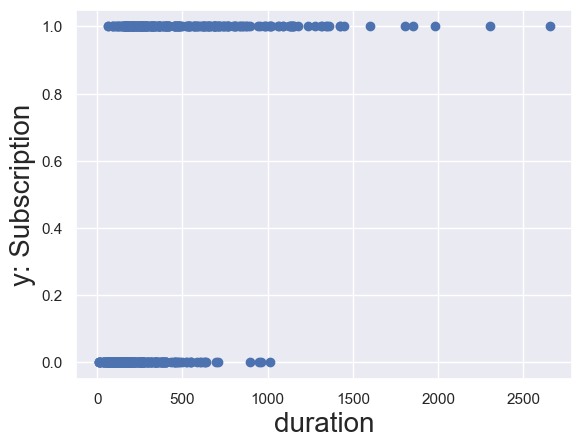

In [8]:
# PLOTING THE Y AGAINST THE FITTED X (X1)

plt.scatter(x1,y,color='C0')
plt.xlabel('duration',fontsize=20)
plt.ylabel('y: Subscription',fontsize=20)
plt.show()

In [9]:
# The odds of duration are the exponential of the log odds from the summary table
np.exp(0.0051)

1.005113027136717

In [10]:
# The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, 
# a change in 1 day would barely affect the regression.
# Note that we could have inferred that from the coefficient itself
# Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Users\USER\AppData\Local\Temp\ipykernel_5260\2614536377.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


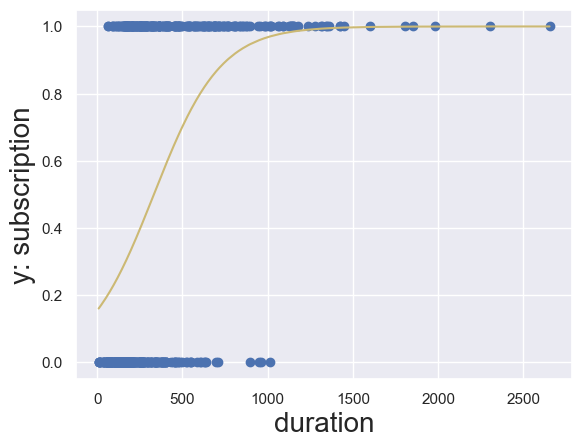

In [11]:
# PLOT LOGISTIC REG CURVE
reg_log = sm.Logit(y,x)  
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('duration', fontsize = 20)
plt.ylabel('y: subscription', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
    

In [12]:
#LOAD DATA
raw_data = pd.read_csv('Bank_data.csv')
raw_data.head()
# Note that interest rate indicates the 3-month interest rate between banks and 
# duration indicates the time since the last contact was made with a given consumer.
# The previous variable shows whether the last marketing campaign was successful with this customer. 
# The march and may are Boolean variables that account for when 
# the call was made to the specific customer and  credit shows if the customer has enough credit to avoid defaulting.

# We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into Boolean values 
# in order to run regressions.

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [13]:
raw_data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [14]:
# make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()   
# Remove the index column that came with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no' values to 0.
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [15]:
# DECLARE THE VARIABLES
y = data['y']
x1 = data['duration']

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.2121
Time:                        05:16:43   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [17]:
# The model used is a Logit regression while the method - Maximum Likelihood Estimation (MLE).
#It has clearly converged after classifyin 518 observations.
#The Pseudo R-squared is 0.21 which is within the 'acceptable region'
#The duration variable is significant (3 zeros after the dot) and its coefficient is 0.0051.
#The constant is also significant and equals: -1.70"

#### Include other variables and run the regrssion

In [18]:
# x1=data[['duration','interest_rate','credit','march','previous']]
# To avoid writing them out every time, save the names of the estimators of our model in a list
estimators=['duration','interest_rate','credit','march','previous']
y=data['y']
x1=data[estimators]

In [19]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.5143
Time:                        05:16:44   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
duration          0.0070      0.001      9.381      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

In [20]:
# THE FEATURES ARE ALL SIGNIFICANT BUT THE march variable has less weight compared to others

#### Accuracy check (confusion matrix)

In [1]:
# Show predicted table
# This is a method to change the formatting of np arrays so they are so legible
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
results_log.predict() #this are the predicted values

NameError: name 'np' is not defined

In [70]:
# np.array(data[estimators]) # or this can be made to be for output (ie y) only since we are predicting the outcome
np.array(data['y'])

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [71]:
# THE VALUES ARE MUCH SO WE SUMMARISE IN A TABLE 
# BY USING THE STATS MODEL METHOD sm.LogitResults.pred_table()
results_log.pred_table()

array([[218.00, 41.00],
       [30.00, 229.00]])

In [72]:
# format the 4 entries above
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [73]:
#calculate the accuracy of the model
cm= np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print(accuracy_train.round(4),'accuracy')

0.8629 accuracy


#### Testing the model and assessing its accuracy
#### with a test dataset diff from training data

In [74]:
# We have to load data our model has never seen before
raw_data2= pd.read_csv('Bank_data_testing.csv')
raw_data2.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [75]:
# MAPPING THE DATA
test_data = raw_data2.copy()
test_data['y']=test_data['y'].map({'yes':1,'no':0})
test_data = test_data.drop(['Unnamed: 0', 'may'], axis=1)
test_data.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,36.0,0


In [76]:
test_data.describe()

,interest_rate,credit,march,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,2.922095,0.031532,0.274775,0.099099,398.860360,0.50000
std,1.891766,0.175144,0.447410,0.299470,410.565798,0.50113
min,0.639000,0.000000,0.000000,0.000000,6.000000,0.00000
25%,1.049250,0.000000,0.000000,0.000000,144.750000,0.00000
50%,1.714000,0.000000,0.000000,0.000000,255.500000,0.50000
75%,4.960000,0.000000,1.000000,0.000000,525.250000,1.00000
max,4.968000,1.000000,1.000000,1.000000,3643.000000,1.00000


In [77]:
# We will use our model to make predictions based on the test data
# We will compare those with the actual outcome
# And calculate the accuracy
# Create a confusion matrix
# In order to predict values using the STATSMODEL method (sm.LogitResults.predict()) we used earlier, our test data should look same as the input data
# on which the regression was trained

In [78]:
x.head()
# order is very important bc the coefficients of the regression will expect it. IF WE FAIL TO DELIVER THE CORRECT ORDER THE PREDICTION WILL BE WRONG

,const,duration,interest_rate,credit,march,previous
0,1.0,117.0,1.334,0.0,1.0,0.0
1,1.0,274.0,0.767,0.0,0.0,1.0
2,1.0,167.0,4.858,0.0,1.0,0.0
3,1.0,686.0,4.120,0.0,0.0,0.0
4,1.0,157.0,4.856,0.0,1.0,0.0


In [84]:
# subscription variable contains the subscription infor
subscription = test_data['y']
subscription.head()

0    0
1    0
2    0
3    1
4    0
Name: y, dtype: int64

In [80]:
# DECLARE VARIABLES
x1_test = test_data[estimators]
x1_test.head()

,duration,interest_rate,credit,march,previous
0,487.0,1.313,0.0,1.0,0.0
1,132.0,4.961,0.0,0.0,0.0
2,92.0,4.856,0.0,1.0,0.0
3,1468.0,4.120,0.0,0.0,0.0
4,36.0,4.963,0.0,0.0,0.0


In [81]:
x1_test = sm.add_constant(x1_test) # THIS WILL MAKE THE TEST DATA LOOK LIKE THE INPUT DATA by adding const
x1_test.head()

,const,duration,interest_rate,credit,march,previous
0,1.0,487.0,1.313,0.0,1.0,0.0
1,1.0,132.0,4.961,0.0,0.0,0.0
2,1.0,92.0,4.856,0.0,1.0,0.0
3,1.0,1468.0,4.120,0.0,0.0,0.0
4,1.0,36.0,4.963,0.0,0.0,0.0


#### Create confusion matrix
#### Unfortunately sm does not provide testing as  functionality unlike scikit learn, so lets create a function called confusion matrix
#### since cm helps summarise otherwise available values


In [93]:
#def confusion_matrix(data,actual_values,model):
# Confusion matrix parameters:
    
# data: data frame or array
# data is a data frame formatted in the same way as your input data (without the actual values)
# e.g. const, var1, var2, etc. Order is very important

# actual_values: data frame or array
# These are the actual values from the test_data
# In the case of a logistic regression, it should be a single column with 0s and 1s

# model: a LogitResults object
# this is the variable where you have the fitted model
# e.g. results_log in this course
    
#Predict the values using the Logit model
    #pred_values = model.predict(data)
# Specify the bins \n",
    #bins=np.array([0,0.5,1])
# Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
# if they are between 0.5 and 1, they will be considered 1
    #cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
# Calculate the accuracy
    #accuracy = (cm[0,0]+cm[1,1])/cm.sum()
# Return the confusion matrix and the accuracy
    #return cm, accuracy

def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data) # the model in this case is (data) the initial but mapped data
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [94]:
cm = confusion_matrix(x1_test,subscription,results_log)
cm
# the left part is the confusion matrix and the right part is the accuracy
# the accuracy value is the figure we use to refer to the overall accuracy of the regression
# ALMOST ALWAYS THE TRAINING ACCURACY IS HIGHER THAN TEST ACCURACY and this is bc of overfitting

(array([[93.00, 18.00],
        [13.00, 98.00]]),
 0.8603603603603603)